# Histogram Analysis
---
The goal of this notebook is to look at the 7 sensors that contain histogram data. 

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, confusion_matrix

In [131]:
data = pd.read_csv('equip_failures_training_set.csv', na_values=['na'], dtype=np.float64)

## Data Preprocessing
---
Here we do some basic methods to preprocess the data and reduce dimensionality using PCA. 

In [132]:
threshold = 1.0 * len(data['target'])
cols = []

for col in data.columns:
    if 'histogram' not in col and 'target' not in col:
        cols.append(col)
        
        
data.drop(columns=cols, inplace=True, axis=1)
data.fillna(value=0.0, inplace=True)
data.head()

,target,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,...,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9
0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,...,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0
1,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,...,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0
2,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,...,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0
3,0.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,...,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,...,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0


## Visualizations
---

(array([1., 0., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([   9128. ,  154498.8,  299869.6,  445240.4,  590611.2,  735982. ,
         881352.8, 1026723.6, 1172094.4, 1317465.2, 1462836. ]),
 <a list of 10 Patch objects>)

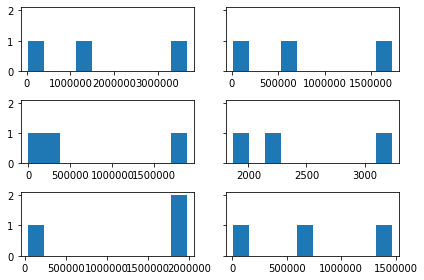

In [133]:
sensor7 = data.loc[:, 'sensor7_histogram_bin4':'sensor7_histogram_bin6']
n_bins = 10

figs, axs = plt.subplots(3, 2, sharey=True, tight_layout=True)

axs[0][0].hist(sensor7.loc[0, :], bins=n_bins)
axs[0][1].hist(sensor7.loc[1, :], bins=n_bins)
axs[1][0].hist(sensor7.loc[2, :], bins=n_bins)
axs[1][1].hist(sensor7.loc[3, :], bins=n_bins)
axs[2][0].hist(sensor7.loc[4, :], bins=n_bins)
axs[2][1].hist(sensor7.loc[5, :], bins=n_bins)

## Train Test Split
---

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = data.loc[:, 'sensor7_histogram_bin0'::]
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Principal Component Analysis
---
Performing PCA on the extracted dataset.

In [135]:
from sklearn.decomposition import PCA

n_comp = 4

pca_train = PCA(n_components=n_comp).fit_transform(x_train)
pca_test = PCA(n_components=n_comp).fit_transform(x_test)
pca = PCA(n_components=n_comp).fit(X)

In [136]:
pca.explained_variance_ratio_

array([0.7103782 , 0.09251757, 0.04985399, 0.04054993])

## Random Forest Classifier
---


In [137]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=5)
rf_model.fit(pca_train, y_train) # x_train

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [138]:
y_pred_test = rf_model.predict(pca_test)
print(f1_score(y_pred=y_pred_test, y_true=y_test))
print(confusion_matrix(y_pred=y_pred_test, y_true=y_test))

0.15510204081632653
[[11774    42]
 [  165    19]]


## Support Vector Machine
---


In [139]:
from sklearn.svm import SVC

svm_model = SVC(gamma='auto')
svm_model.fit(pca_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [140]:
y_pred_test = svm_model.predict(pca_test)
print(f1_score(y_pred=y_pred_test, y_true=y_test))
print(confusion_matrix(y_pred=y_pred_test, y_true=y_test))

0.0
[[11816     0]
 [  184     0]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## Logisitic Regression
---


In [142]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(pca_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
y_pred_test = log_model.predict(pca_test)
print(f1_score(y_pred=y_pred_test, y_true=y_test))
print(confusion_matrix(y_pred=y_pred_test, y_true=y_test))

0.09503988900450919
[[9254 2562]
 [  47  137]]


## Keras Model
---
The goal behind this model is to serialize all histogram data into a vector of shape (70,). This vector will be fed into the model and a one-hot encoded vector with two elements will be the output

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=70))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Now we need to reshape the data so that it can be trained using the model

## References
---
https://pdfs.semanticscholar.org/b8c8/347f9c33935b97703ecd35a67af5c5508487.pdf

https://arxiv.org/pdf/1202.1436.pdf

https://arxiv.org/pdf/1303.6199.pdf

https://link.springer.com/chapter/10.1007/978-3-642-13312-1_1           